# HW2
by: Lam Tran 
UCSC 170B - Spring 2023 \
Week 2 Homework: Data reduction \
<u> I-Deriving PCA from the SVD  </u> 

1. Implement principal component analysis for an arbitrary dataset: you may use an implementation of the singular value decomposition

In [242]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sb

cancer = pd.read_csv('ovarian_cancer.csv')
df = cancer.drop(columns = ['status', 'patients'])

In [243]:
def PCA(x):
    # (1) Compute mean of each row:
    x_bar = X.mean(axis = 1)
    #(1.1) Construct the average matrix
    X_bar = x_bar*np.ones((1, X.shape[1]))
    #(2) Substract mean from data
    B = X - X_bar
    # Method(2): (3)Perform SVD decomposition on matrix B
    U, S, VT = np.linalg.svd(B, full_matrices=False) 
    # Use the singular values from S to construct a diag matrix S
    S = np.diag(S)
    # (4) Construct principle component matrix
    T = np.matmul(U,S)
    # Return principle component matrux T and Sigma from SVD decomposition
    return T,S

2. Using the ovarian_cancer.csv dataset from the last homework, apply your implementation of PCA. Plot singular values and plot the fraction of variance corresponding to each singular value. 




In [244]:
X = np.mat(df)

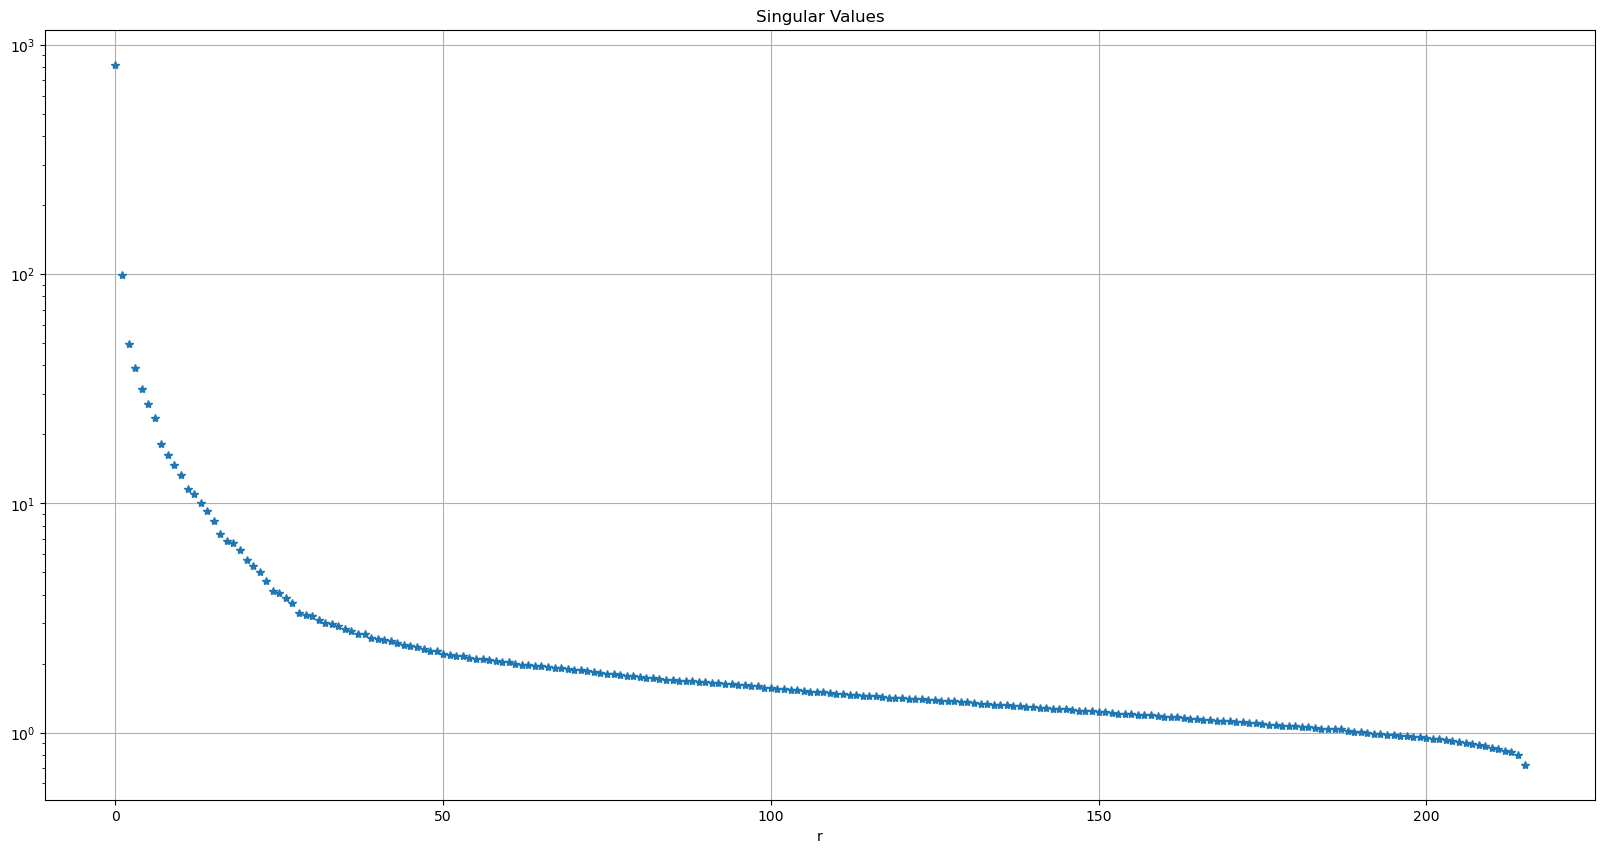

In [245]:
T, S = PCA(X)

plt.figure(figsize = (20,10))
plt.semilogy(np.diag(S), '*')
plt.title('Singular Values')
plt.xlabel('r')
plt.grid()
plt.show()

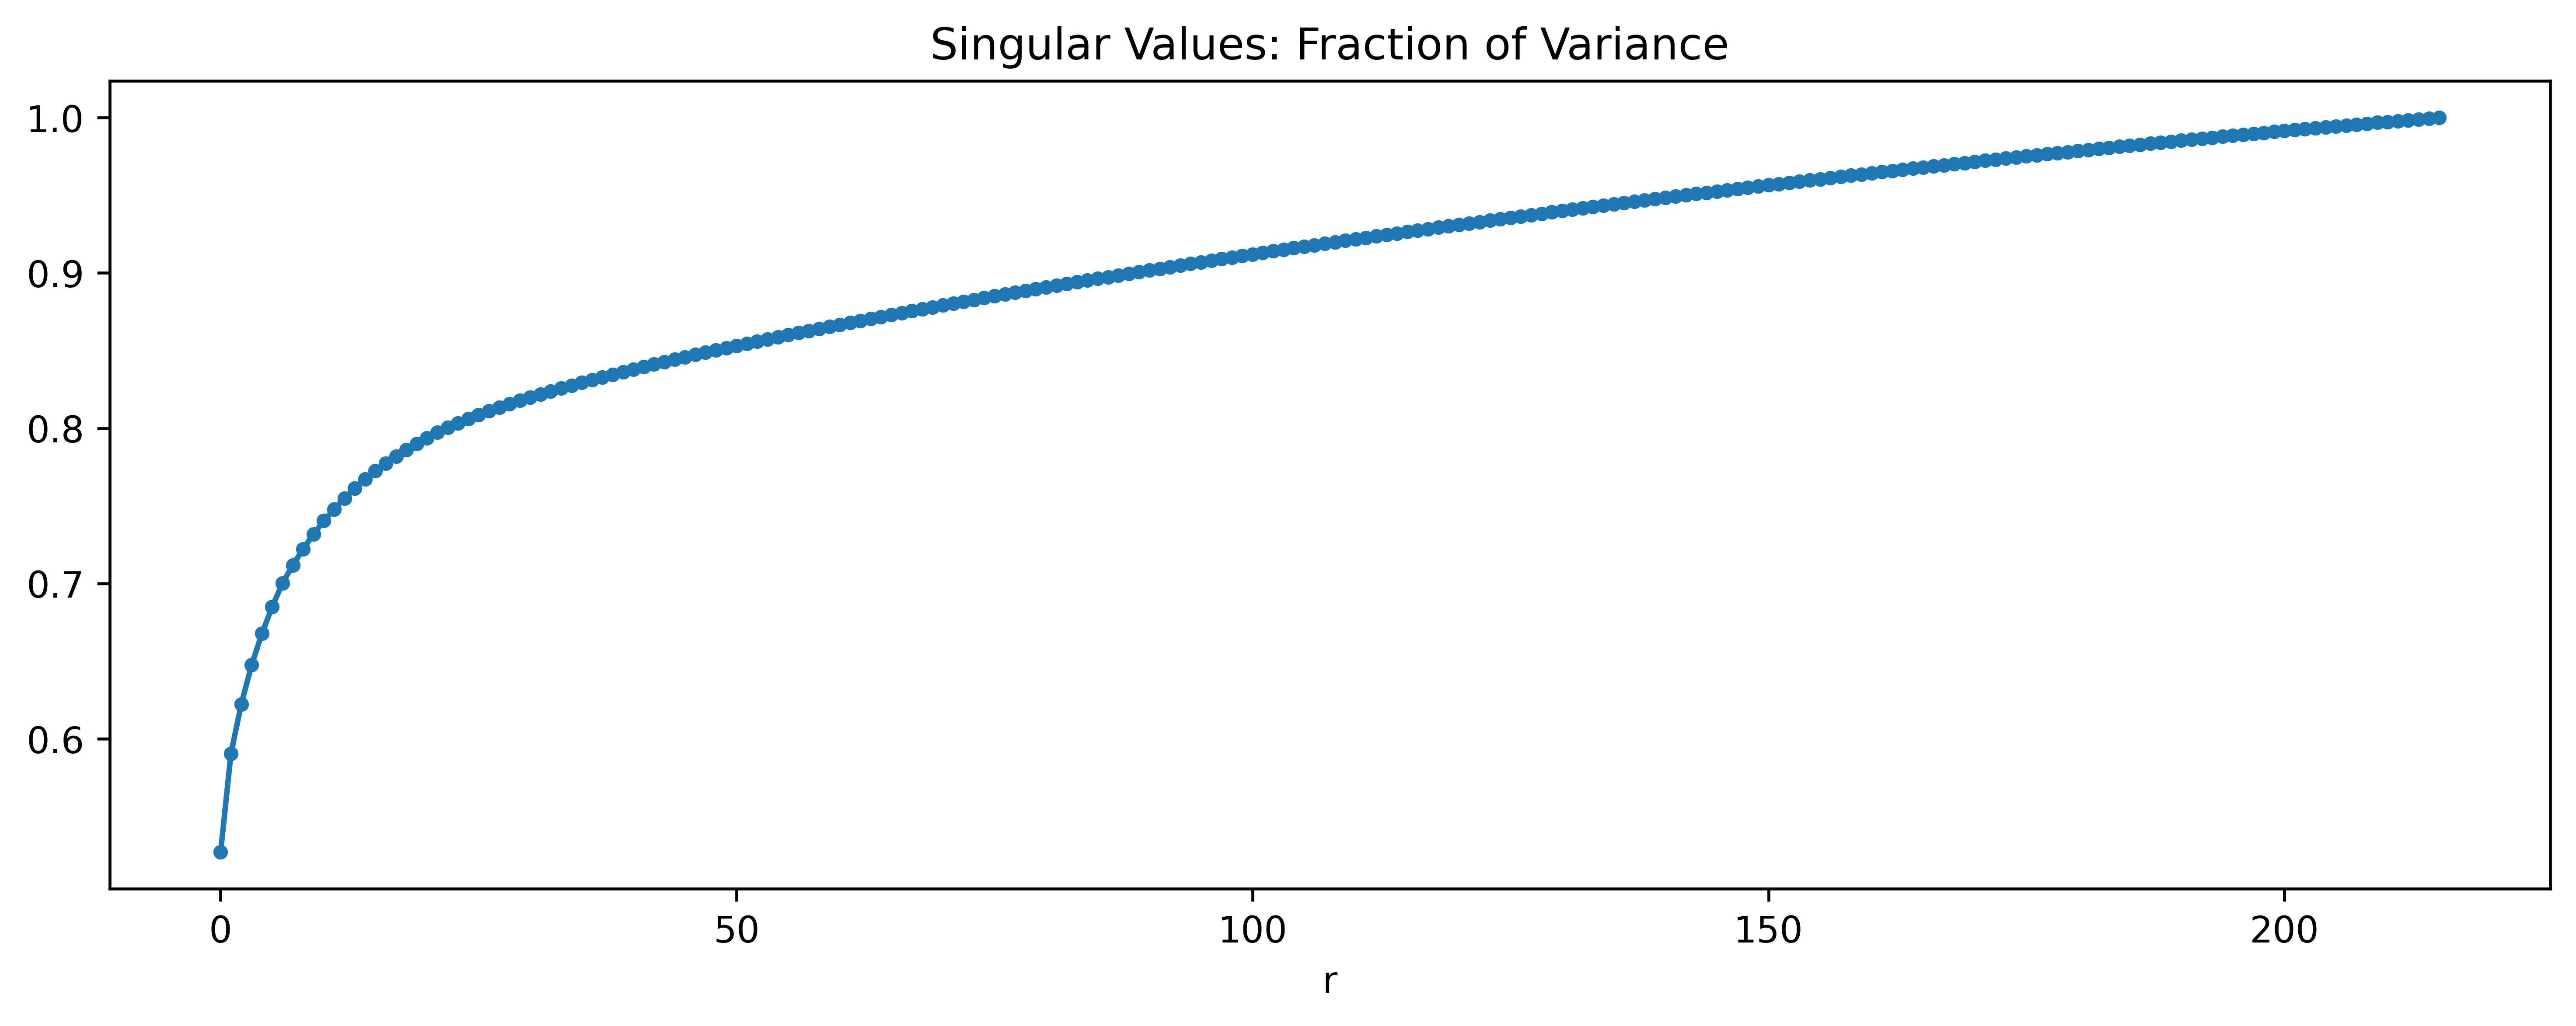

In [246]:
 # Calculate the fraction of variance corresponding to each singular value
plt.figure(figsize = (12,4), dpi = 600)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)), '.-')
#plt.semilogy(variance_fraction, 'o')
plt.xlabel('r')
plt.title('Singular Values: Fraction of Variance')
plt.show()

In [247]:
target = cancer.iloc[:,0] # 'status' column
dl1 = pd.DataFrame(T[:,0])
dl2 = pd.DataFrame(T[:,1])
principal_df = pd.concat([dl1, dl2 , pd.DataFrame(target)] , axis = 1)

3. Find the two first principal components. Note that the ith principal component is calculated by: 
$$u_i = argmax_{\lVert u_i \rVert} =1 u{_i^T} B^T Bu_i$$
where $B$ is the covariance matrix of the our observations $X$. \
Plot the reduced data projection onto the first two principal components. Color data points by their status (cancer vs normal)

<AxesSubplot:xlabel='0', ylabel='0'>

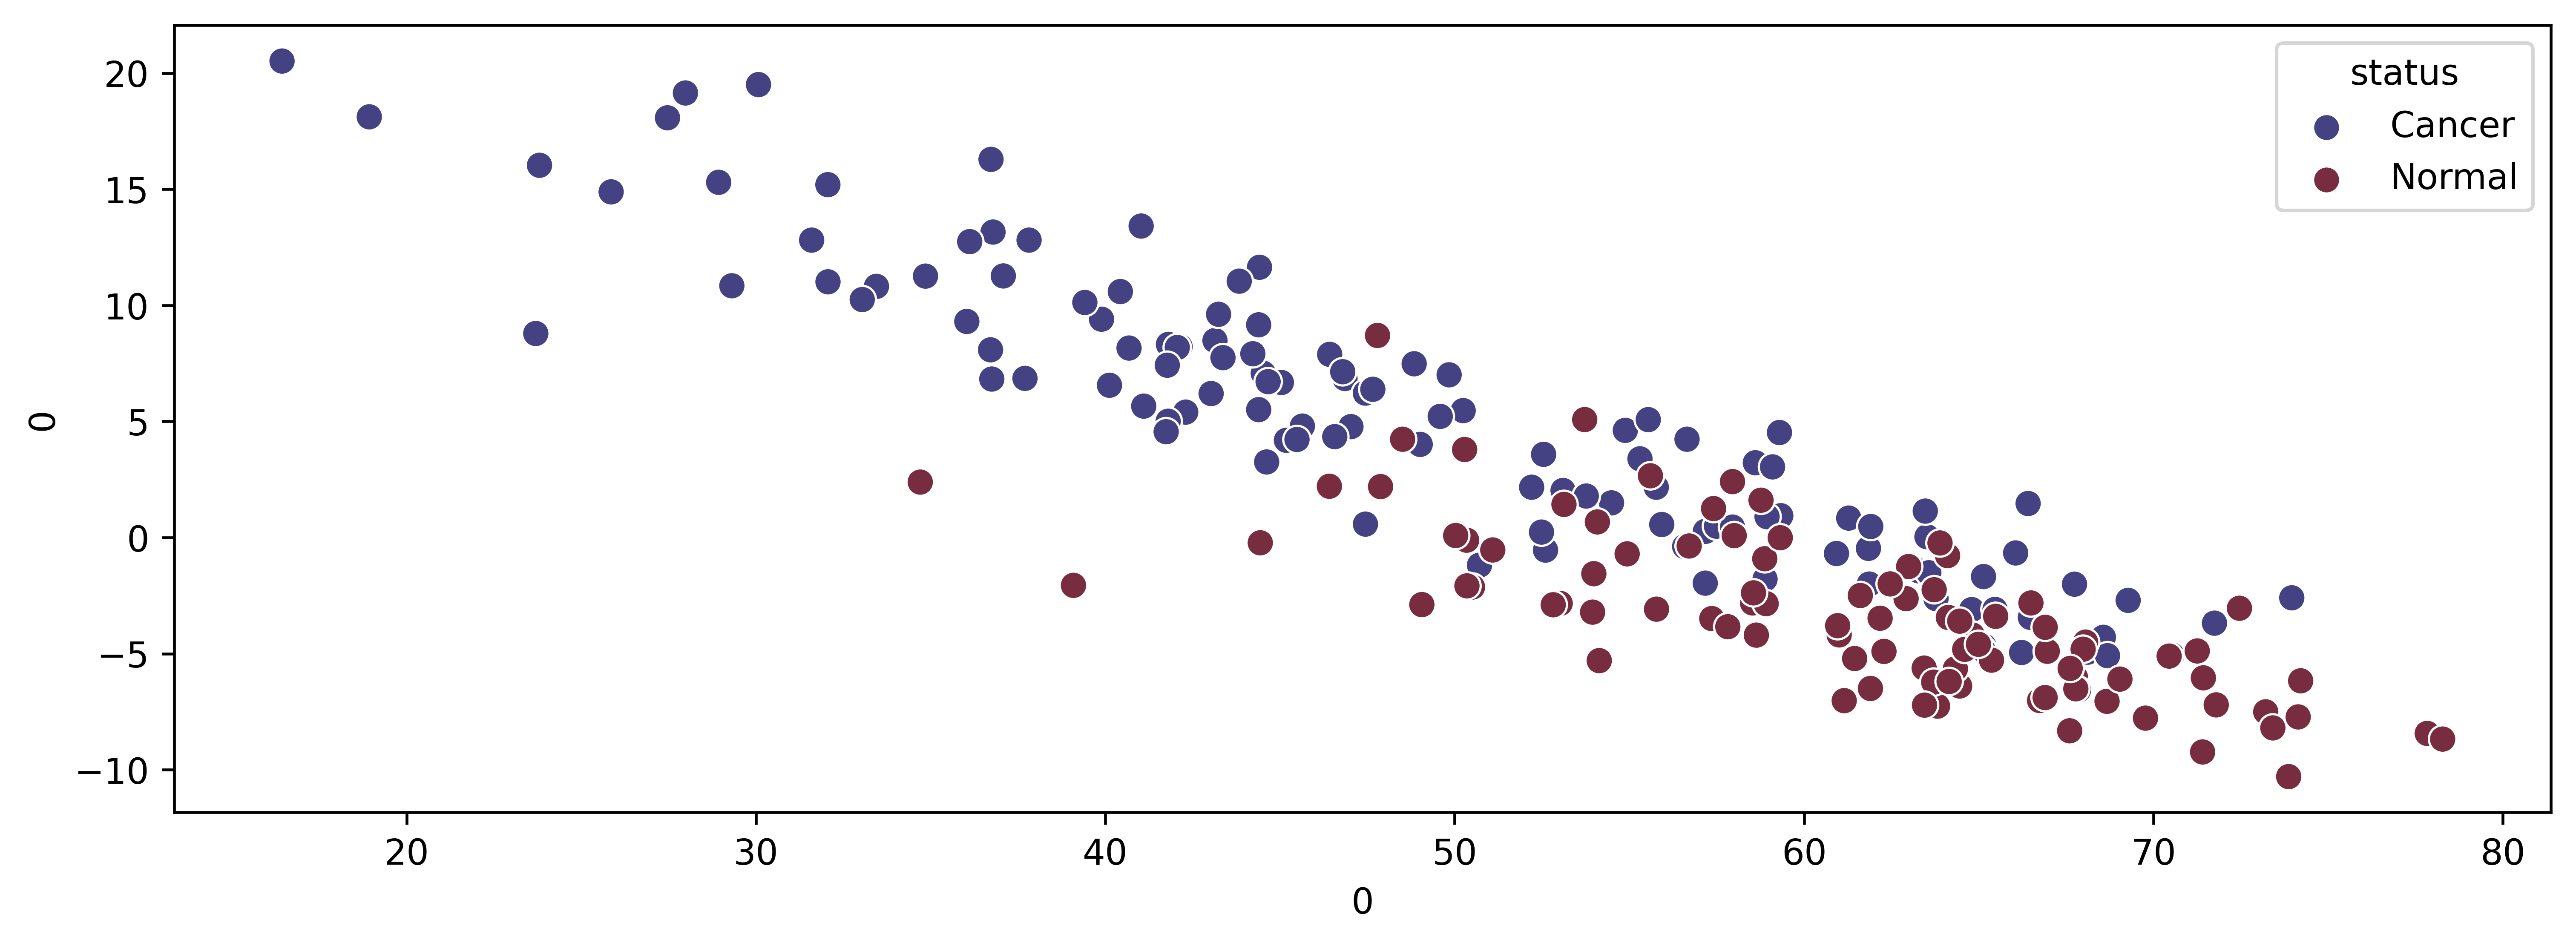

In [248]:
plt.figure(figsize = (12,4), dpi = 600)
sb.scatterplot(data = principal_df , x = principal_df.iloc[:,0], y = principal_df.iloc[:,1], hue = 'status' , s = 60 , palette= 'icefire')